# Assignment #4: Linear Models and Decision Trees
## Foundations of Machine Learning
## Do Q1 and one other question.
### Advice: Reuse your code and code from lectures, package routine tasks into functions, make plans about how you'll carry out the analysis before jumping into writing code, and work as efficiently as possible

**Q1.** This question is a case study for linear models and decision trees. The data are about car prices. In particular, they include:

  - `Price`, `Color`, `Seating_Capacity`
  - `Body_Type`: crossover, hatchback, muv, sedan, suv 
  - `Make`, `Make_Year`: The brand of car and year produced
  - `Mileage_Run`: The number of miles on the odometer
  - `Fuel_Type`: Diesel or gasoline/petrol
  - `Transmission`, `Transmission_Type`:  speeds and automatic/manual

  1. Load `cars_hw.csv`. These data were really dirty, and I've already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly scaled variables that require a log or arcsinh transformation). Clean the data however you think is most appropriate.
  2. Summarize the `Price` variable and create a kernel density plot. Use `.groupby()` and `.describe()` to summarize prices by brand (`Make`). Make a grouped kernel density plot by `Make`. Which car brands are the most expensive? What do prices look like in general?
  3. Split the data into an 80% training set and a 20% testing set.
  4. Let's focus on linear models. Make a model where you regress price on the numeric variables alone; what is the $R^2$ and `RMSE` on the test set? Make a second model where, for the categorical variables, make a model comprised of one-hot encoded regressors/features alone, and regress price on those variables; what is the $R^2$ and `RMSE` on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the $R^2$ and `RMSE` on the test set? Does the joint model perform better or worse, and by home much?
  5. Use the `PolynomialFeatures` function from `sklearn` to expand the set of numerical variables you're using, along with the categorical variables. As you increase the degree of the expansion, how do the $R^2$ and `RMSE` change? At what point does $R^2$ go negative on the test set? For your best model with expanded features, what is the $R^2$ and `RMSE`? How does it compare to your best model from part 3?
  6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.
  7. Now, let's use a regression tree. Construct an appropriate matrix of regressors/features, and fit a tree to the data. Vary the maximum depth of the decision tree using the `max_depth` option (i.e. `tree.DecisionTreeRegressor(max_depth=D)`), and compute the $R^2$ and `RMSE` on the test set of a variety of depths. What depth tree gives the best results?
  8. For your best tree, determine the predicted values for the test data, and plot them against the true values. Do the predicted values and true values line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero?
  12. Which model --- linear model or classification and regression tree --- has better performance on the test set?

         Make  Make_Year   Color  Body_Type  Mileage_Run No_of_Owners  \
0  Volkswagen       2017  silver      sedan        44611          1st   
1     Hyundai       2016     red  crossover        20305          1st   
2       Honda       2019   white        suv        29540          2nd   
3     Renault       2017  bronze  hatchback        35680          1st   
4     Hyundai       2017  orange  hatchback        25126          1st   

   Seating_Capacity Fuel_Type Transmission Transmission_Type   Price  \
0                 5    diesel      7-Speed         Automatic  657000   
1                 5    petrol      5-Speed            Manual  682000   
2                 5    petrol      5-Speed            Manual  793000   
3                 5    petrol      5-Speed            Manual  414000   
4                 5    petrol      5-Speed            Manual  515000   

   Log_Mileage_Run  Log_Price  
0        10.705736  13.395439  
1         9.918622  13.432785  
2        10.293501  13.583579  


Text(0.5, 1.0, 'Boxplot of Log Price')

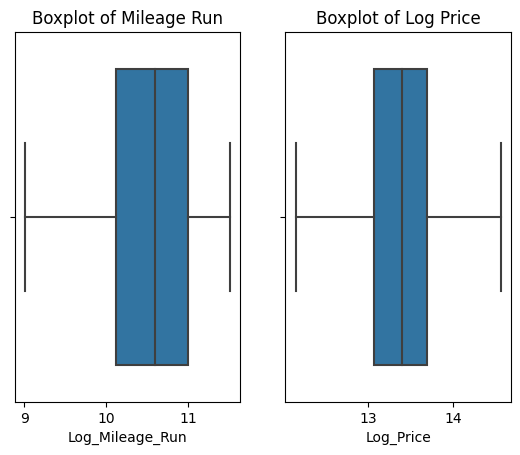

In [163]:
#NOTE: PART 1 HERE
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

cars = pd.read_csv("data/cars_hw.csv")

# dropping unnamed column
cars = cars.drop(columns=['Unnamed: 0'])

cars['Log_Mileage_Run'] = np.log(cars['Mileage_Run'])
cars['Log_Price'] = np.log(cars['Price'])

print(cars.head())

# Searching for outliers
# sns.histplot(cars['Log_Mileage_Run'], kde=True)
# sns.histplot(cars['Price'], kde=True)

# sns.scatterplot(data=cars, x = "Log_Mileage_Run", y= "Log_Price")

# plt.subplot(1, 2, 1)
# sns.boxplot(x=cars['Log_Mileage_Run'])
# plt.title('Boxplot of Log Mileage Run')

# plt.subplot(1, 2, 2)
# sns.boxplot(x=cars['Log_Price'])
# plt.title('Boxplot of Log Price')

#dropping outliers in mileage run
cars = cars.loc[cars["Log_Mileage_Run"] > 9, :]
cars = cars[cars["Log_Price"].between(12,14.75)]


# printing boxplots of data
plt.subplot(1, 2, 1)
sns.boxplot(x=cars['Log_Mileage_Run'])
plt.title('Boxplot of Mileage Run')

plt.subplot(1, 2, 2)
sns.boxplot(x=cars['Log_Price'])
plt.title('Boxplot of Log Price')



#DONE WITH CLEANING

C:\Users\Hieut\AppData\Local\Temp\ipykernel_48936\3530106553.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(cars['Log_Price'], shade=True)


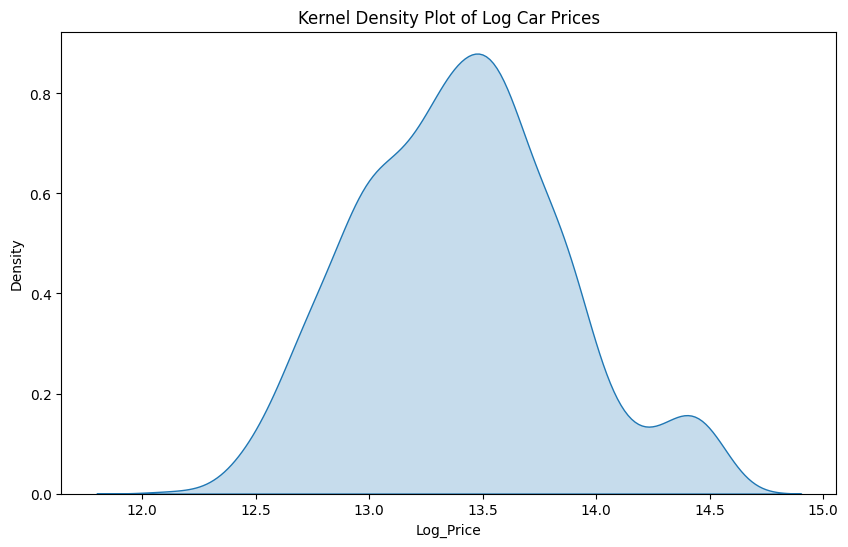

In [164]:
#PART 2 HERE

# categorical_columns = ['Make', 'Color', 'Body_Type', 'No_of_Owners', 'Fuel_Type', 'Transmission', 'Transmission_Type']



price_summary = cars['Log_Price'].describe()

# Creating a kernel density plot for the 'Price' variable
plt.figure(figsize=(10, 6))
sns.kdeplot(cars['Log_Price'], shade=True)
plt.title('Kernel Density Plot of Log Car Prices')
plt.xlabel('Log_Price')
plt.ylabel('Density')
plt.show()



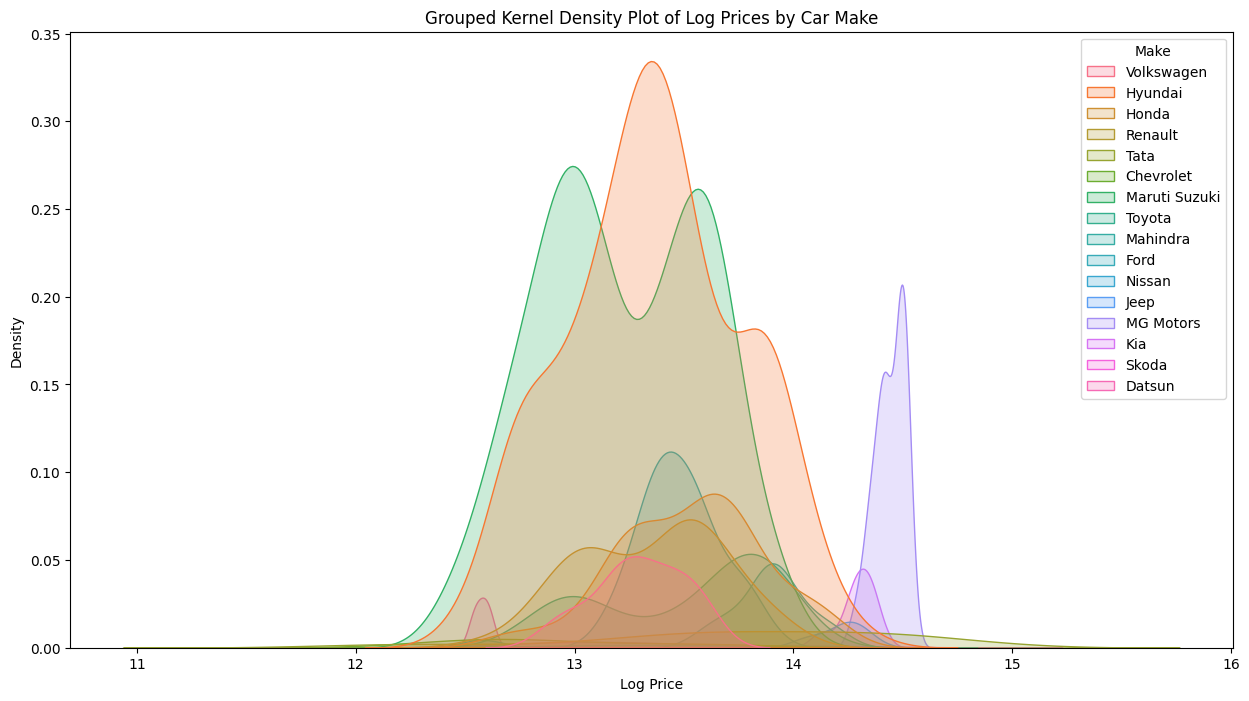

,count,mean,std,min,25%,50%,75%,max
Make,,,,,,,,
MG Motors,34.0,14.440120,0.066953,14.278615,14.395422,14.429615,14.497597,14.518113
Kia,8.0,14.292177,0.076877,14.129591,14.272242,14.303105,14.349515,14.369970
Jeep,4.0,14.216591,0.105084,14.070153,14.183270,14.240265,14.273586,14.315680
Mahindra,18.0,13.898953,0.159906,13.587354,13.851808,13.905680,13.961249,14.197366
Tata,17.0,13.754316,0.709986,12.144197,13.559327,13.767370,14.345550,14.557448
Honda,71.0,13.524855,0.330639,12.663497,13.271645,13.556740,13.725037,14.159809
Toyota,42.0,13.508659,0.387591,12.815838,13.019220,13.725586,13.842152,13.903521
Ford,51.0,13.467034,0.212800,12.577636,13.361380,13.468786,13.575984,13.879424
Nissan,2.0,13.382207,0.440013,13.071070,13.226638,13.382207,13.537775,13.693343


In [165]:
# PART 2 CONTINUED


# # Creating a grouped kernel density plot by 'Make'

price_by_make_summary = cars.groupby("Make")["Log_Price"].describe()


plt.figure(figsize=(15,8))
sns.kdeplot(data=cars, x="Log_Price", hue="Make", fill=True)
plt.title("Grouped Kernel Density Plot of Log Prices by Car Make")
plt.xlabel("Log Price")
plt.ylabel("Density")
plt.show()

cars.groupby("Make")["Log_Price"].describe()
price_by_make_summary.sort_values(by="mean", ascending=False)



In [166]:
# ANSWERING Which car brands are the most expensive? What do prices look like in general?

print("""
The top 3 most expensive car brands are MG Motors, Kia, and Jeep. The log of the prices seem to be in the range of 12.5 to 14.5 in general. For MG
Motors the average log car price was around 14.4, for Kia, it was around 14.29, and for Jeep, it was 14.21. The lower end for the prices are from
the Datsun, Chevrolet, and Maruti Suzuki companies. The log average prices for these lower companies were 12.57, 12.91, and 13.21 respectively.
Although the more expensive cars tended to be in MG Motors, Kia, and Jeep, the most expensive car was by the Tata company, with a log price of 14.55.
""")


The top 3 most expensive car brands are MG Motors, Kia, and Jeep. The log of the prices seem to be in the range of 12.5 to 14.5 in general. For MG
Motors the average log car price was around 14.4, for Kia, it was around 14.29, and for Jeep, it was 14.21. The lower end for the prices are from
the Datsun, Chevrolet, and Maruti Suzuki companies. The log average prices for these lower companies were 12.57, 12.91, and 13.21 respectively.
Although the more expensive cars tended to be in MG Motors, Kia, and Jeep, the most expensive car was by the Tata company, with a log price of 14.55.



In [167]:
# NOTE: DOING PART 3 HERE
from sklearn.model_selection import train_test_split
X = cars.drop(columns="Log_Price")
Y = cars["Log_Price"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [168]:
#NOTE: PART 4 HERE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder


# cars.info()
numeric_columns = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_columns = X.select_dtypes(include=['object']).columns.tolist()

X_train_numeric = X_train[numeric_columns]
X_test_numeric = X_test[numeric_columns]

# Model 1: Linear Regression with the Numeric Variables
model_1 = LinearRegression()
model_1.fit(X_train_numeric, Y_train)

Y_pred_1 = model_1.predict(X_test_numeric)
r2_model_1 = r2_score(Y_test, Y_pred_1)
rmse_model_1 = mean_squared_error(Y_test, Y_pred_1, squared=False)

print(f"The R^2 value for my model 1 is {r2_model_1}")
print(f"The RMSE value for my model 1 is {rmse_model_1}")


# Model 2: Linear Regression with Categorical Variables
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(X_train[categorical_columns])
X_test_encoded = encoder.transform(X_test[categorical_columns])


model_2 = LinearRegression()
model_2.fit(X_train_encoded, Y_train)
Y_pred_2 = model_2.predict(X_test_encoded)
r2_model_2 = r2_score(Y_test, Y_pred_2)
rmse_model_2 = mean_squared_error(Y_test, Y_pred_2, squared=False)

print(f"The R^2 value for my model 2 is {r2_model_2}")
print(f"The RMSE value for my model 2 is {rmse_model_2}")

# Model 3: Linear Regression with Combined Numeric and Categorical Variables
# https://pandas.pydata.org/docs/reference/api/pandas.concat.html
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html
# https://stackoverflow.com/questions/54570947/feature-names-from-onehotencoder

encoded_columns = encoder.get_feature_names_out(categorical_columns)

X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoded_columns, index=X_train.index)
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoded_columns, index=X_test.index)

X_train_total = pd.concat([X_train_numeric, X_train_encoded_df], axis=1)
X_test_total = pd.concat([X_test_numeric, X_test_encoded_df], axis=1)


model_3 = LinearRegression()
model_3.fit(X_train_total, Y_train)
Y_pred_3 = model_3.predict(X_test_total)
r2_model_3 = r2_score(Y_test, Y_pred_3)
rmse_model_3 = mean_squared_error(Y_test, Y_pred_3, squared=False)

print(f"The R^2 value for my model 3 is {r2_model_3}")
print(f"The RMSE value for my model 3 is {rmse_model_3}")


# ANSWERING: Does the joint model perform better or worse, and by how much?

print("""
The joint model performs much better than that of both the individual numeric variable model and the categorical variable model. The joint model
has a R^2 value of 0.96 while the numeric model has a lower R^2 value of 0.925 (Difference of approximately 0.035)and the categorical model also 
has a lower R^2 value of 0.68 (Differencce of approximately 0.28). When comparing the RMSE Values, the joint model has the best RMSE of 0.089
while the numeric model has an RMSE of 0.128 (Difference of approximately 0.039) and the categorical model has a RMSE value of 0.265 (Difference
of 0.176).
""")

The R^2 value for my model 1 is 0.9252132681633849
The RMSE value for my model 1 is 0.1285072523329608
The R^2 value for my model 2 is 0.6805611044436236
The RMSE value for my model 2 is 0.26558849511953586
The R^2 value for my model 3 is 0.9638657107642021
The RMSE value for my model 3 is 0.0893254306330142

The joint model performs much better than that of both the individual numeric variable model and the categorical variable model. The joint model
has a R^2 value of 0.96 while the numeric model has a lower R^2 value of 0.925 (Difference of approximately 0.035)and the categorical model also 
has a lower R^2 value of 0.68 (Differencce of approximately 0.28). When comparing the RMSE Values, the joint model has the best RMSE of 0.089
while the numeric model has an RMSE of 0.128 (Difference of approximately 0.039) and the categorical model has a RMSE value of 0.265 (Difference
of 0.176).



c:\Users\Hieut\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [169]:
# NOTE: PART 5 HERE
from sklearn.preprocessing import PolynomialFeatures

degrees = range(1, 6)
r2_values = []
rmse_values = []


for degree in degrees:

    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train_numeric)
    X_test_poly = poly.transform(X_test_numeric)

    X_train_poly_combined = np.concatenate((X_train_poly, X_train_encoded), axis=1)
    X_test_poly_combined = np.concatenate((X_test_poly, X_test_encoded), axis=1)

    # Fit the model
    model_poly = LinearRegression()
    model_poly.fit(X_train_poly_combined, Y_train)

    # Predict and evaluate
    Y_pred_poly = model_poly.predict(X_test_poly_combined)
    r2 = r2_score(Y_test, Y_pred_poly)
    rmse = mean_squared_error(Y_test, Y_pred_poly, squared=False)

    r2_values.append(r2)
    rmse_values.append(rmse)

    # Check if R^2 goes negative
    if r2 < 0:
        break


degree_results = pd.DataFrame({"Degree": degrees, "R^2": r2_values, "RMSE": rmse_values})
degree_results




,Degree,R^2,RMSE
0,1,0.963866,0.089325
1,2,0.990739,0.045220
2,3,0.997956,0.021243
3,4,0.999623,0.009124
4,5,0.999593,0.009485


In [170]:
#NOTE: PART 5 CONTINUED
#ANSWERING "How does it compare to your best model from part 3?

print("""
For all degrees, the R^2 results and RMSE Values are better than that from my best model in part 3. My best model in part 3 had a R^2 value 
of 0.96 and RMSE of 0.089. In contrast, even the lowest degree of 1 had an R^2 value of 0.963 and an RMSE of 0.089325. Even though the RMSE is
the same, the R^2 value is higher. This continues with the higher degrees too with degree 4 having the best R^2 and RMSE values (0.999623 and 0.009124)
respectively.
""")



For all degrees, the R^2 results and RMSE Values are better than that from my best model in part 3. My best model in part 3 had a R^2 value 
of 0.96 and RMSE of 0.089. In contrast, even the lowest degree of 1 had an R^2 value of 0.963 and an RMSE of 0.089325. Even though the RMSE is
the same, the R^2 value is higher. This continues with the higher degrees too with degree 4 having the best R^2 and RMSE values (0.999623 and 0.009124)
respectively.



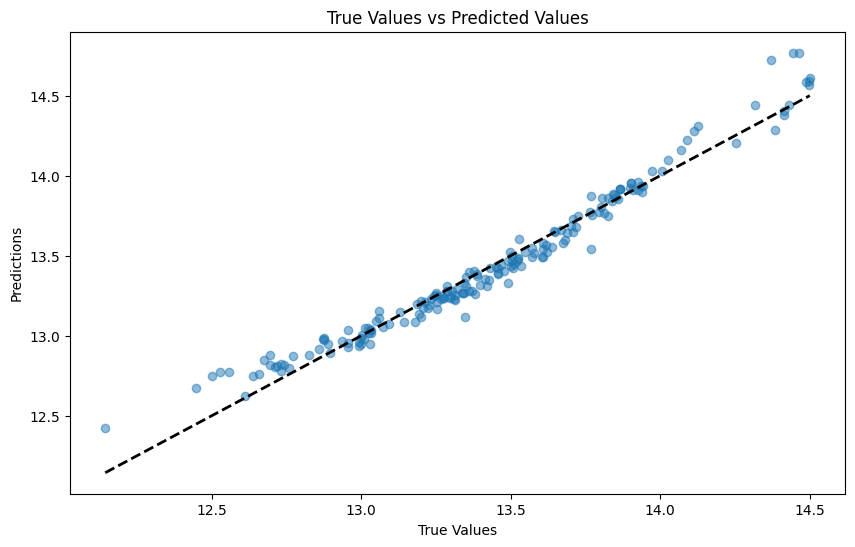

C:\Users\Hieut\AppData\Local\Temp\ipykernel_48936\3558407455.py:20: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(residuals, shade=True)


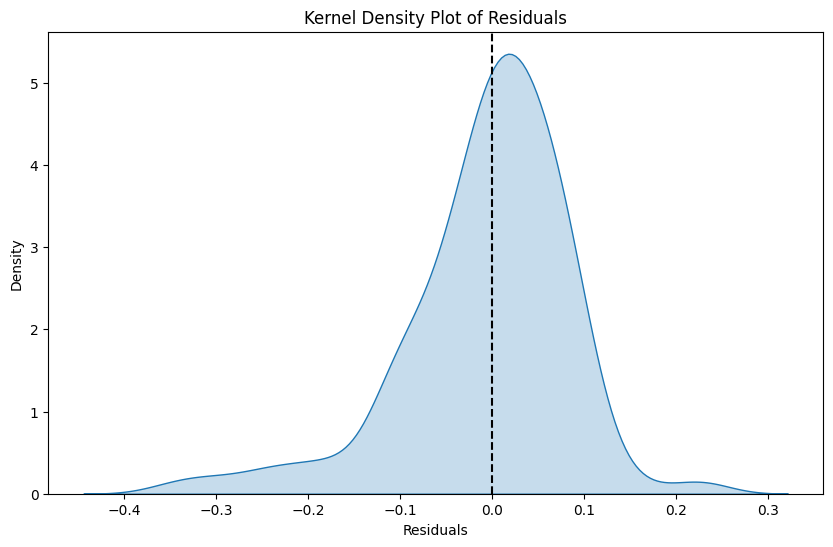

In [171]:
#NOTE: PART 6 HERE

# Using the best model (Model 3) to predict values on the test set
Y_pred_best = model_3.predict(X_test_total)

# Plotting predicted vs. true values
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_pred_best, alpha=0.5)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)  # Diagonal line
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs Predicted Values')
plt.show()

# Calculating residuals
residuals = Y_test - Y_pred_best

# Kernel density plot of residuals
plt.figure(figsize=(10, 6))
sns.kdeplot(residuals, shade=True)
plt.title('Kernel Density Plot of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.axvline(x=0, color='k', linestyle='--')  # Vertical line at zero
plt.show()



In [172]:
# NOTE: QUESTION 6 ANSWERS HERE

"""
  Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data 
  and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.
"""

print("""
From the graphs above, the predicted and true values roughtly line up along the diagonal. The kernel density plot was also created above. As we
can see, the residuals look roughly bell-shaped around zero. Some of the strengths of my model is that it  has a good alignment of predicted and true values 
and normally distributed residuals, indicating it captures the underlying relationship well and generalizes effectively to new data. One weakness
of the model is that it is not precisely a bell curve at zero. It is slightly right skewed. This might cause some issues with the predictions.
""")




From the graphs above, the predicted and true values roughtly line up along the diagonal. The kernel density plot was also created above. As we
can see, the residuals look roughly bell-shaped around zero. Some of the strengths of my model is that it  has a good alignment of predicted and true values 
and normally distributed residuals, indicating it captures the underlying relationship well and generalizes effectively to new data. One weakness
of the model is that it is not precisely a bell curve at zero. It is slightly right skewed. This might cause some issues with the predictions.



In [173]:
# NOTE: PART 7 HERE

from sklearn.tree import DecisionTreeRegressor


depths = range(1, 11)

r2_scores = []
rmse_scores = []

for depth in depths:
    tree_model = DecisionTreeRegressor(max_depth=depth, random_state=42)  
    tree_model.fit(X_train_total, Y_train) 
    Y_pred_tree = tree_model.predict(X_test_total)
    r2 = r2_score(Y_test, Y_pred_tree)  
    rmse = mean_squared_error(Y_test, Y_pred_tree, squared=False)
    r2_scores.append(r2)  
    rmse_scores.append(rmse)

# Creating a DataFrame with the results
depth_results = pd.DataFrame({"Depth": list(depths), "R^2": r2_scores, "RMSE": rmse_scores})
depth_results 



,Depth,R^2,RMSE
0,1,0.613235,0.292239
1,2,0.876076,0.165422
2,3,0.971461,0.079384
3,4,0.990890,0.044850
4,5,0.996745,0.026809
5,6,0.998138,0.020275
6,7,0.998336,0.019170
7,8,0.998445,0.018533
8,9,0.998436,0.018586
9,10,0.998415,0.018709


In [174]:
# NOTE: Continuing 7 here

print("""
The depth tree that gives the best results in this case is the tree with a depth of 8. The R^2 value here is 0.998445 and the RMSE value
is 0.018533. 
""")



The depth tree that gives the best results in this case is the tree with a depth of 8. The R^2 value here is 0.998445 and the RMSE value
is 0.018533. 



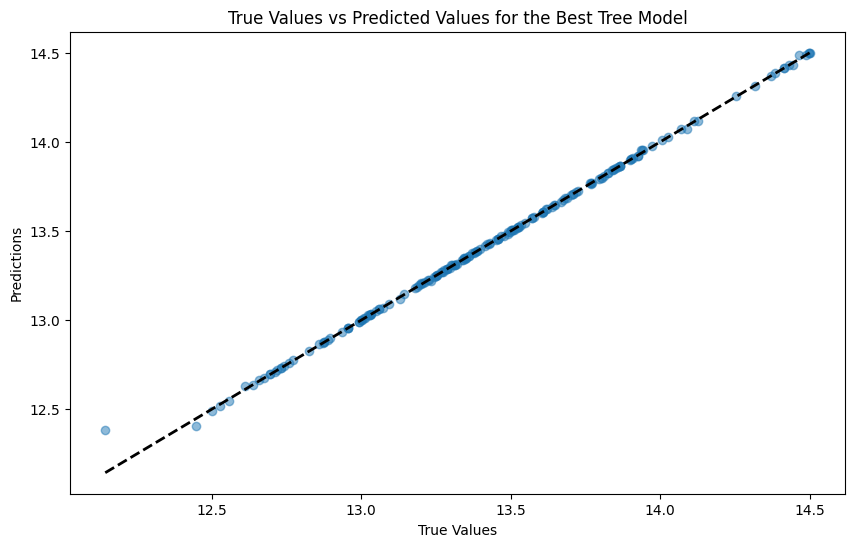


As we can see, the predicted and true values line up nearly one to up across the diagonal. 



In [175]:
#NOTE PART 8 HERE

# Determining best tree predicted values
best_depth = depth_results.sort_values(by="R^2", ascending=False).iloc[0]['Depth']
best_tree_model = DecisionTreeRegressor(max_depth=int(best_depth), random_state=42)
best_tree_model.fit(X_train_total, Y_train)
Y_pred_best_tree = best_tree_model.predict(X_test_total)

#PLOTTING THEM AGAINST TRUE VALUES
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_pred_best_tree, alpha=0.5)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs Predicted Values for the Best Tree Model')
plt.show()

print("""
As we can see, the predicted and true values line up nearly one to up across the diagonal. 
""")



C:\Users\Hieut\AppData\Local\Temp\ipykernel_48936\991325047.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(residuals, shade=True)


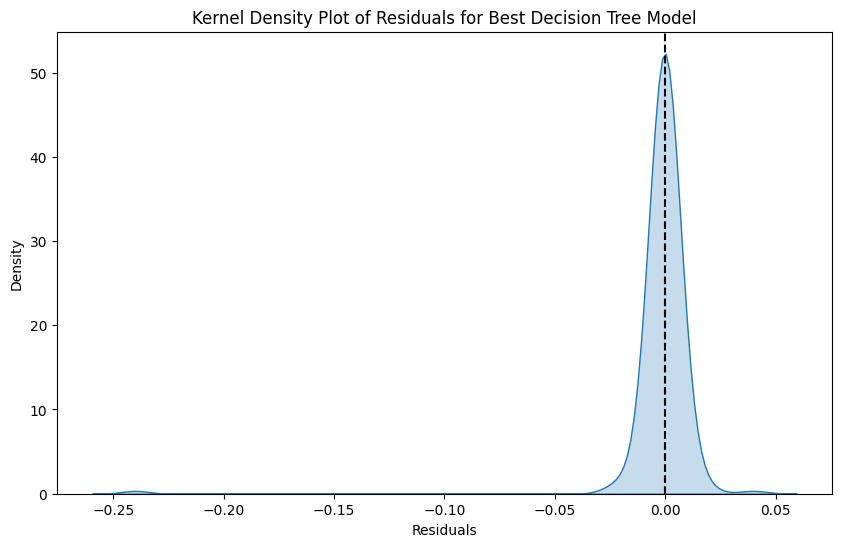


As we can see, the residuals clearly plot a bell shape around 0.0.



In [176]:
#NOTE: Part 8 continued

#calcing the residuals

residuals = Y_test - Y_pred_best_tree

#making graph for kernel density plot of residuals

plt.figure(figsize=(10,6))
sns.kdeplot(residuals, shade=True)
plt.title("Kernel Density Plot of Residuals for Best Decision Tree Model")
plt.xlabel("Residuals")
plt.ylabel("Density")
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axvline.html
plt.axvline(x=0, color='k', linestyle='--')
plt.show()

print("""
As we can see, the residuals clearly plot a bell shape around 0.0.
""")

In [177]:
#NOTE: PART 9 HERE
# Which model --- linear model or classification and regression tree --- has better performance on the test set?

print("""
From my results, it is evident that the decision tree model had the best performance on the test set with a R^2 of 0.9984 and a RMSE of 0.0185.
On the other hand, the combined Linear model only had a R^2 score of 0.9639 and an RMSE of 0.0893. 
""")



From my results, it is evident that the decision tree model had the best performance on the test set with a R^2 of 0.9984 and a RMSE of 0.0185.
On the other hand, the combined Linear model only had a R^2 score of 0.9639 and an RMSE of 0.0893. 



**Q2.** The is a question about regression using decision trees and linear models. The data include wages at data science-y jobs, including

  - `Rating`: Company worker happiness score
  - `Size`: Number of employees
  - `Sector`: Part of the economy
  - `avg_salary`: Average wage
  - `job_state`: Location of work

  1. Load the `wages_hw.csv` file. Split the sample into an ~80% training set and a ~20% test set. Do any necessary cleaning, including outliers and missings.
  2. Use a linear model to regress `avg_salary` on `Sector`. Which sectors have the highest predicted wages? What is the $R^2$ and `RMSE` on the test set? 
  3. Make a scatterplot of `avg_salary` and `Rating`. Is there an obvious visual relationship between the two variables? Regress `avg_salary` on `Rating` as a numeric variable: Do higher ratings predict higher or lower wages? Convert `Rating` to a one-hot encoded variable, with a category for each rating. Run a regression of `avg_salary` on the categorical version. How do your results change? Explain. Which version has a higher $R^2$ and lower `RMSE`?
  4. Now interact `Sector` with the categorical version of `Rating`, so your regressors are a (Sector, Rating) pair; this is a programming puzzle you'll have to think about, but using the `.PolynomialFeatures()` function on the one-hot encoded categorical variables is one option, and another is pre-processing a new variable that interacts `Sector` and `Rating` and then one-hot encoding the result. Regress `avg_salary` on the (Sector, Rating) pairs. How does the $R^2$ and `RMSE` on the test set compare to part 2? Interpret the coefficients; which sector-rating pairs have the highest wages?
  5. Run a linear regression of `avg_salary` on all the variables. What is the $R^2$ on the test set? How does it compare to your simpler models in 2--4? 
  6. Build a decision tree by regressing `avg_salary` on `Sector`, `Rating`, and the (Sector, Rating) pairs. What are the $R^2$ and `RMSE` of your models on the test set? How do your answers compare to parts 2, 3, and 4?
  7. Build a decision tree by regressing `avg_salary` on all the other variables. What is the $R^2$ and `RMSE` on the test set?
  8. Build a linear regression or decision tree using the available variables based on your own judgment. What degrees of freedom are you giving the model to predict variation in wages across company and location attributes? What is the $R^2$ and `RMSE` of your model? How does it compare to the previous ones in the question? Why does yours perform better or worse on the test set?

**Q3.** This a question purely on categorical prediction. The data for this happen to be gathered in 1987 in Indonesia, and concern contraceptive method choice. The questions and data-gathering assumptions reflect the culture and attitudes of that time and place, but provide a good example of a categorical prediction problem on an important topic (family planning and maternal health The variables in the data are:

    - Wife's age (numerical)
    - Wife's education (categorical) 1=low, 2, 3, 4=high 
    - Husband's education (categorical) 1=low, 2, 3, 4=high 
    - Number of children ever born (numerical) 
    - Wife's religion (binary) 0=Non-Islam, 1=Islam
    - Wife's now working? (binary) 0=Yes, 1=No
    - Husband's occupation (categorical) 1, 2, 3, 4
    - Standard-of-living index (categorical) 1=low, 2, 3, 4=high
    - Media exposure (binary) 0=Good, 1=Not good
    - Contraceptive method used (class attribute) 1=No-use, 2=Long-term, 3=Short-termhort-term

  1. Load the `contraceptiveMethodChoice.csv` data. Tabulate the `method` variable (i.e. `.value_counts()`). 1 corresponds to `No Contraception`, 3 corresponds to `Short Term` (e.g. condoms, birth control pills), and 2 corresponds to `Long Term` (e.g. IUD, sterilization). Cross tabulate `method` and `numberChildren`. Do couples that use birth control tend to have more children than those who don't?
  2. Split the sample into ~80% training data and ~20% testing data.
  3. We are now going to make a mistake. Train a regression tree to predict the contraceptive method using the other variables in the data, not a classification tree. Look at the terminal nodes in the tree: What values do they take? Does that make sense? Explain clearly what has gone wrong here.
  4. Instead of regression, use a classification tree to predict contraceptive method using the other variables in the data. How does it look different from the previous tree? What variables does the algorithm use? In broad terms, which groups of people are most likely to use each method of contraception?
  5. Compute a confusion matrix for your classification tree on the test set (Hint: There are now three categories instead of two, so the cross tabulation will be a $3 \times 3$ matrix instead of $2 \times 2$.). Compute the Accuracy of your model overall, and the Accuracy for predicting each contraceptive method.
  7. Why can't you use a linear probability model to do this exercise? Explain clearly in words.

**Q4.** This is a question where we use regression and regression trees. The outcome is whether a defendant is held pre-trial in the Virginia justice system. We would like to understand how that outcome is predicted by characteristics of the defendant, particularly race. Let's be very careful/clear: We aren't saying anyone *should* be held without bond or asserting that people with different demographic variables *should* be more likely to be held, but instead trying to predict whether people with different characteristics *are empirically more likely* to be held without bond, given the available information. This is the first step we would take in investigating whether a system is fair, or how large the disparities are: Does it treat people with similar observable characteristics similarly, or not? We are going to look at a common question: Are Black defendants treated differently from white or Asian ones? (There are Native American defendants, but there are 11 in total, which is such a small number of observations that is difficult to clearly say anything about how this group is treated relative to the others.)

The variables in the data are:

  - `held_wo_bail`: Whether a defendant is held without bail before trial (Boolean logical)
  - `race`, `sex`: Categorical demographic variables
  - `is_poor`: Whether the defendant is classified as indigent 
  - `prior_F`, `prior_M`: The number of prior felony and misdemeanor arrests
  - `case_type`: A categorical variable indicating a misdemeanor `M` or felony `F` or infraction `I` or special case `S`
  - `age`: Defendant's age
  - `bond`, `bond_NA`, `bond_type`: The amount of any bond, whether it is missing, and the type
  - `sentence`, `sentence_NA`, `sentence_type`: The length of any sentence, whether it is missing, and the type

1. Load the `pretrial_data.csv` data. Notice that there are `nan`s, but the data are relatively clean. Because there are `.nan`s among variables you won't use, you'll want to narrow down your analysis to the relevant variables before dropping or imputing missing values.
2. Create a dummy variable indicating that the defendant is Black.
3. Regress `held` on `Black`. What is the slope coefficient Interpret the coefficient on the Black dummy variable: How much more likely is a black person to be held without bail? What is the $R^2$ of the model?
4. Before doing this question, please think for a few minutes about how to make the process of running these regressions as efficient as possible, before jumping into writing code. Repeat part 2, for the following specifications, keeping track of the coefficient on the Black dummy variable each time:
      - `held` on `Black` and `sex`
      - `held` on `Black` and `sex` and `is_poor`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F` and `case_type`
What happens to the coefficient on the Black dummy variable as you include more regressors/features/controls in the regression? Explain your findings.
5. Suppose we don't want to see just `Black` and `sex`, but `Black` interacted with `sex`: Are Black men and Black women treated systemically differently from the rest of the population? Implement this in a regression, and explain your findings.
6. Imagine someone argued we should use these kinds of models to help a judge or magistrate make bail decisions (you could obviously go back and make this kind of model for the bond and sentence variables, then deploy it on new cases to predict what their bond and sentence values would be). What concerns would you have? Do you think society should be using data-driven and automated tools like that? Explain your concerns clearly.

In [179]:
#NOTE: PART 1 HERE
data = pd.read_csv("data/pretrial_data.csv")

data.head()


,Unnamed: 0,case_type,age,sex,race,is_poor,bond,bond_type,prior_F,prior_M,gini,released,sentence_type,sentence,bond_NA,held_wo_bail,sentence_NA
0,0,F,31.0,M,W,NaN,NaN,7,0.0,0.0,0.44,NaN,NaN,NaN,True,False,True
1,1,F,60.0,M,B,NaN,NaN,7,13.0,21.0,0.44,0.0,0.0,60.000000,True,False,False
2,2,M,27.0,M,W,NaN,NaN,7,0.0,0.0,0.44,0.0,1.0,12.000000,True,False,False
3,3,M,27.0,M,B,0.0,NaN,7,0.0,9.0,0.44,0.0,1.0,0.985626,True,False,False
4,4,F,28.0,F,W,0.0,NaN,7,0.0,0.0,0.44,1.0,4.0,0.000000,True,False,True


In [180]:
#NOTE: PART 2 HERE
columns_important = ['held_wo_bail', 'race', 'sex', 'is_poor', 'prior_F', 
                    'prior_M', 'case_type', 'age', 'bond', 'bond_NA', 
                    'bond_type', 'sentence', 'sentence_NA', 'sentence_type']
data_revised = data[columns_important]

data_clean = data_revised.dropna(subset=['held_wo_bail'])

data_clean['Black'] = data_clean['race'] == 'B'

X = data_clean[['Black']].astype(int)
y = data_clean['held_wo_bail'].astype(int)


In [183]:
# NOTE: PART 3 HERE
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

slope_coeff = log_reg.coef_[0][0]
r_squared = log_reg.score(X,y)

print(f"The Slope Coefficient for this logistic regression is {slope_coeff}")
print(f"The R^2 value of the model is {r_squared}")


#Answering what the coefficent for the "black" dummy variable means

print("""
With all other variables held constant, the logistic regression coefficient of 0.374 shows that being Black is linked to a higher 
log odds of being detained without bail as compared to not being Black, which in this case includes all other races. Based on the 
model assumptions, Black defendants had a higher probability of being detained without bond than defendants of other races.
""")


The Slope Coefficient for this logistic regression is 0.37445746210540415
The R^2 value of the model is 0.7410162707735143

With all other variables held constant, the logistic regression coefficient of 0.374 shows that being Black is linked to a higher 
log odds of being detained without bail as compared to not being Black, which in this case includes all other races. Based on the 
model assumptions, Black defendants had a higher probability of being detained without bond than defendants of other races.



In [188]:
#NOTE: PART 4 HERE

data_clean['Male'] = data_revised['sex'] == 'M'

#NOTE: Converting the categorical variables to dummy variables
case_type_dummies = pd.get_dummies(data_clean['case_type'], prefix='case_type')

data_clean = pd.concat([data_clean, case_type_dummies], axis=1)


# Handling all 4 specification cases here
X_specs = {
    'spec_1': ['Black', 'Male'],
    'spec_2': ['Black', 'Male', 'is_poor'],
    'spec_3': ['Black', 'Male', 'is_poor', 'prior_F'],
    'spec_4': ['Black', 'Male', 'is_poor', 'prior_F', 'case_type_F', 'case_type_I', 'case_type_M', 'case_type_S']
}

results = {}

for spec_name, spec_vars in X_specs.items():
    X = data_clean[spec_vars].fillna(0).astype(int)
    log_reg = LogisticRegression()
    log_reg.fit(X, y)

    # Extracting and storing the coefficient for 'Black' and the model R-squared
    black_coeff_index = X.columns.tolist().index('Black')

    # https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
    results[spec_name] = {
        'Black_coeff': log_reg.coef_[0][black_coeff_index],
        'R_squared': log_reg.score(X, y)
    }

# NOTE: Making Dataframe from results to have cleaner look
results_df = pd.DataFrame(results).T
results_df.rename(columns={'Black_coeff': 'Coefficient for Black', 'R_squared': 'R^2'}, inplace=True)
results_df.reset_index(inplace=True)
results_df.rename(columns={'index': 'Specification'}, inplace=True)
results_df


,Specification,Coefficient for Black,R^2
0,spec_1,0.348753,0.741016
1,spec_2,0.214136,0.741016
2,spec_3,0.155614,0.752328
3,spec_4,0.144359,0.794484


In [190]:
# NOTE: PART 4 Continued Response

print("""
At first, the Black dummy variable's coefficient is comparatively large when the model contains only a small number of variables 
(such race and sex). This illustrates that the chance of being detained without bail is more strongly correlated with being Black.
The coefficient for Black falls when more factors (such as is_poor, prior_F, and case_type) are included in the model. 
This suggests that these other factors may account for a portion of the first reported impact of race on the result.
When these factors are accounted for, the isolated effect of race (being Black, in this case) on the likelihood of being held without 
bail is reduced.
""")




At first, the Black dummy variable's coefficient is comparatively large when the model contains only a small number of variables 
(such race and sex). This illustrates that the chance of being detained without bail is more strongly correlated with being Black.
The coefficient for Black falls when more factors (such as is_poor, prior_F, and case_type) are included in the model. 
This suggests that these other factors may account for a portion of the first reported impact of race on the result.
When these factors are accounted for, the isolated effect of race (being Black, in this case) on the likelihood of being held without 
bail is reduced.



In [192]:
#NOTE: PART 5 HERE

# setting up new variable for black male
data_clean['Black_Male'] = data_clean['Black'] & data_clean['Male']
X_interaction = data_clean[['Black', 'Male', 'Black_Male']]

# Making logistic regression for that data
log_reg_interaction = LogisticRegression()
log_reg_interaction.fit(X_interaction, y)

# https://stackoverflow.com/questions/57924484/finding-coefficients-for-logistic-regression
coeff_black = log_reg_interaction.coef_[0][0]
coeff_male = log_reg_interaction.coef_[0][1]
coeff_black_male = log_reg_interaction.coef_[0][2]
r_squared_interaction = log_reg_interaction.score(X_interaction, y)

# Converting it into a dataframe for better viewing experience
interaction_results = pd.DataFrame({
    'Variable': ['Black', 'Male', 'Black_Male'],
    'Coefficient': [coeff_black, coeff_male, coeff_black_male]
})

interaction_results


,Variable,Coefficient
0,Black,-0.099749
1,Male,0.348951
2,Black_Male,0.568465


In [195]:
# NOTE: PART 5 Continued Response

print("""
When taking into account the interaction with sex, the negative coefficient for Black people (-0.100) indicates that, 
as compared to non-Black people, being Black is related with a somewhat lower risk of being held without bail.
In contrast to females, males have a larger independent probability of being detained without bond, as indicated by the positive 
coefficient for Male (0.349). The interaction term's positive and comparatively big coefficient (0.568) indicates a substantial 
positive correlation between being Black and male with the chance of being detained without bond. This suggests that Black men are
more likely than members of other groups to be held without bond and to get different treatment.
In essence, the model indicates that while being Black or male individually have certain effects, the intersection of these identities 
(being a Black male) results in a notably higher likelihood of being held without bail. This finding points towards a systemic difference 
in treatment for Black men compared to other demographic groups in the context of pretrial holding decisions.
""")





When taking into account the interaction with sex, the negative coefficient for Black people (-0.100) indicates that, 
as compared to non-Black people, being Black is related with a somewhat lower risk of being held without bail.
In contrast to females, males have a larger independent probability of being detained without bond, as indicated by the positive 
coefficient for Male (0.349). The interaction term's positive and comparatively big coefficient (0.568) indicates a substantial 
positive correlation between being Black and male with the chance of being detained without bond. This suggests that Black men are
more likely than members of other groups to be held without bond and to get different treatment.
In essence, the model indicates that while being Black or male individually have certain effects, the intersection of these identities 
(being a Black male) results in a notably higher likelihood of being held without bail. This finding points towards a systemic difference 
in trea

In [194]:
#NOTE: PART 6 HERE

print("""
There are a number of serious issues with using models like the one we've covered to help courts or magistrates decide on bail. 
These issues mostly relate to ethics, justice, and the limitations of data-driven models. Firstly, there are ethical concerns with 
the employment of automated technologies in courtroom decision-making. There is a chance that the procedure will become dehumanizing, 
that people will be treated like data points, and that their special circumstances and chances for recovery would be overlooked.
Secondly, a lot of elements go into making complicated judicial decisions, some of which might not be measurable or included in the dataset. 
If a data-driven model is used too often, it may oversimplify these choices and ignore the specifics of each situation. Thirdly, models can 
only be as objective as the training set of data. The model's predictions will be biased if the historical data it was trained on contains 
biases (such as systemic racial biases). This has the potential to maintain or worsen already-existing disparities within the legal system.
In essence, the application of data-driven and automated technologies in delicate domains such as judicial decision-making requires caution, 
even though they can provide insightful information and significant efficiency.
""")


There are a number of serious issues with using models like the one we've covered to help courts or magistrates decide on bail. 
These issues mostly relate to ethics, justice, and the limitations of data-driven models. Firstly, there are ethical concerns with 
the employment of automated technologies in courtroom decision-making. There is a chance that the procedure will become dehumanizing, 
that people will be treated like data points, and that their special circumstances and chances for recovery would be overlooked.
Secondly, a lot of elements go into making complicated judicial decisions, some of which might not be measurable or included in the dataset. 
If a data-driven model is used too often, it may oversimplify these choices and ignore the specifics of each situation. Thirdly, models can 
only be as objective as the training set of data. The model's predictions will be biased if the historical data it was trained on contains 
biases (such as systemic racial biases). This has t

**Q5.** This is a math question to review the derivation of the OLS estimator (but only if you are into that kind of thing!). We are going to do it slightly differently from what we did in class, though. We will use a linear predictor and minimize the Sum of Squared Errors, just as in class. But, we are going to de-mean $X$ first, creating another variable $z_i = x_i - \bar{x}$ where 
$$
\bar{x} = \dfrac{1}{N} \sum_{i=1}^N x_i,
$$
so the model is $\hat{y}_i = a + b z_i$ and the `SSE` is
$$
\text{SSE}(a,b) = \sum_{i=1}^N (y_i - a - bz_i)^2.
$$

  1. Take partial derivatives of the `SSE` with respect to $a$ and $b$. You should get

\begin{eqnarray*}
\sum_{i=1}^N -2(y_i - a- bz_i) &=& 0 \\
\sum_{i=1}^N -2(y_i - a - bz_i)z_i &=& 0.
\end{eqnarray*}

  2. Solve for the solutions to the above equations. Big hint: $\bar{z} = 0$, since we subtracted the mean of $x$ from $x$ to get $z$. You should get

\begin{eqnarray*}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})z_i}{\sum_{i=1}^N z_i^2}.
\end{eqnarray*}

  3. Substitute $z_i = x_i - \bar{x}$ back into the above equations. You should get
  
\begin{eqnarray*}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})(x_i-\bar{x})}{\sum_{i=1}^N (x_i-\bar{x})^2},
\end{eqnarray*}

which can be written in terms of sample covariance and sample variance as:

\begin{eqnarray*}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\text{cov}(x,y)}{\text{var}(x)}.
\end{eqnarray*}

This is typically the preferred way of expressing the OLS coefficients.

4. When will $b^*$ be large or small, depending on the relationship between $x$ and $y$ and the amount of "noise"/variance in $x$? What does $a^*$ represent?
5. Suppose you have measurement error in $x$ which artificially inflates its variance (e.g. bad data cleaning). What happens to the $b^*$ coefficient? How will affect your ability to predict? (This phenomenon is called **attenuation**.)
6. Let's return to the question of *outliers*. With your formula for the OLS coefficients $(a^*,b^*)$, explain what happens if you significantly increase a single value of the outcome/target/response variable $y_i$ or one of the predictor/explanatory/covariate variables $x_i$. If values for some extreme observations are exerting significant influence over the regression coefficients, will the model perform well on for more average observations?